In [1]:
import numpy as np
from collections import deque
from termcolor import colored
from collections import defaultdict
# SETTINGS Constants
from copy import deepcopy
import random
import torch.nn as nn
import torch.nn.functional as F
import torch
from torchsummary import summary
import matplotlib.pyplot as plt


from modules.TestManager import TestMapManager, TestGamesManager
import time
from pathlib import Path
import datetime
import pickle
import numpy as np
from concurrent.futures import ThreadPoolExecutor
from settings import *
print('look ahead: ', LOOK_AHEAD)

look ahead:  0


In [2]:
from modules.TestManager import TestMapManager, TestGamesManager
from modules.GoldStrike import GoldStrike

LEVEL=10

test_map=TestMapManager().load_test_map(10, 21)
# len(test_map[0][:])
game=GoldStrike(5,pre_loaded_map=test_map)
[game.next_wave(test_map) for _ in range(5)]
[game.next_wave_still_block() for _ in range(5)]

# sliced_arr = test_map[:, :34]
len(test_map[0])
game.display()
game.get_valid_moves()

Level: 5
Current wave: 10/34
Progression: 0.29
Board:
[[6 6 6 6 6 3 4 2 1 1 0 0 0 0 0 0]
 [6 6 6 6 6 4 4 1 2 2 0 0 0 0 0 0]
 [6 6 6 6 6 2 3 2 2 2 0 0 0 0 0 0]
 [6 6 6 6 6 2 1 4 2 2 0 0 0 0 0 0]
 [6 6 6 6 6 2 4 1 3 4 0 0 0 0 0 0]
 [6 6 6 6 6 2 2 4 1 3 0 0 0 0 0 0]
 [6 6 6 6 6 4 2 4 1 4 0 0 0 0 0 0]
 [6 6 6 6 6 2 4 1 1 4 0 0 0 0 0 0]
 [6 6 6 6 6 3 1 2 1 3 0 0 0 0 0 0]
 [6 6 6 6 6 2 4 3 3 1 0 0 0 0 0 0]]


{1: [(0, 6, 4), (1, 5, 4), (1, 6, 4)],
 2: [(0, 8, 1), (0, 9, 1)],
 3: [(1, 8, 2),
  (1, 9, 2),
  (2, 7, 2),
  (2, 8, 2),
  (2, 9, 2),
  (3, 8, 2),
  (3, 9, 2)],
 4: [(2, 5, 2), (3, 5, 2), (4, 5, 2), (5, 5, 2), (5, 6, 2), (6, 6, 2)],
 5: [(5, 7, 4), (6, 7, 4)],
 6: [(5, 8, 1), (6, 8, 1), (7, 7, 1), (7, 8, 1), (8, 8, 1)],
 7: [(6, 9, 4), (7, 9, 4)],
 8: [(9, 7, 3), (9, 8, 3)],
 'next_wave': []}

In [4]:
from modules.GoldStrike import GoldStrike
from modules.MCTS import MCTS
import  time 
results={}
LEVEL=10
N_SIMS=[20]

def update_score(new_score):
    # Declare the variable as global
    global local_max_score
    local_max_score = new_score

for number_of_sims in N_SIMS:
    results.update({f'{number_of_sims}':[]})
    for _ in range(1):
        test_map=TestMapManager().load_test_map(10, 21)
        game=GoldStrike(LEVEL,pre_loaded_map=test_map)
        [game.next_wave(test_map) for _ in range(10)]

        mcts = MCTS(game)
        local_max_score = 0
        moves=0
        mcts.root.game_state.display_pretty_board()

        while not mcts.root.game_state.isTerminated():
            mcts.run(number_of_sims, 50, None)
            action = mcts.select_action()
            mcts.root.game_state.make_move(action, preloaded_map=test_map)
            # mcts = MCTS(mcts.root.game_state)

            if action != NEXT_WAVE:
                #To keep this branch simulation history if we didnt make next wave 
                mcts.set_pervious_child_as_root(mcts.root.children[action])
                # temp_num_sims = 100
            else:
                local_max=mcts.get_max_score()
                mcts = MCTS(mcts.root.game_state)
                mcts.update_max_score(local_max)
                # temp_num_sims = number_of_sims
            mcts.root.game_state.display_pretty_board()

            moves += 1

        results[str(number_of_sims)].append((mcts.root.game_state.get_game_result(),mcts.root.game_state.get_total_score()))
        print(results)
        time.sleep(2)


Level: 10
Current wave: 54/54
Progression: 1.0
Score: 7280
Bonus: 4000
Board:
[0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] 
[0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] 
[0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] 
[0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] 
[0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] 
[0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] 
[0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] 
[0] [0] [0] [0] [0] [3] [0] [0] [2] [0] [0] [0] [0] [0] [0] [0] 
[0] [0] [0] [0] [0] [4] [2] [0] [4] [0] [2] [0] [0] [2] [0] [4] 
[0] [2] [0] [0] [0] [1] [3] [2] [1] [2] [3] [2] [1] [3] [4] [1] 
{'20': [(1, 7280)]}


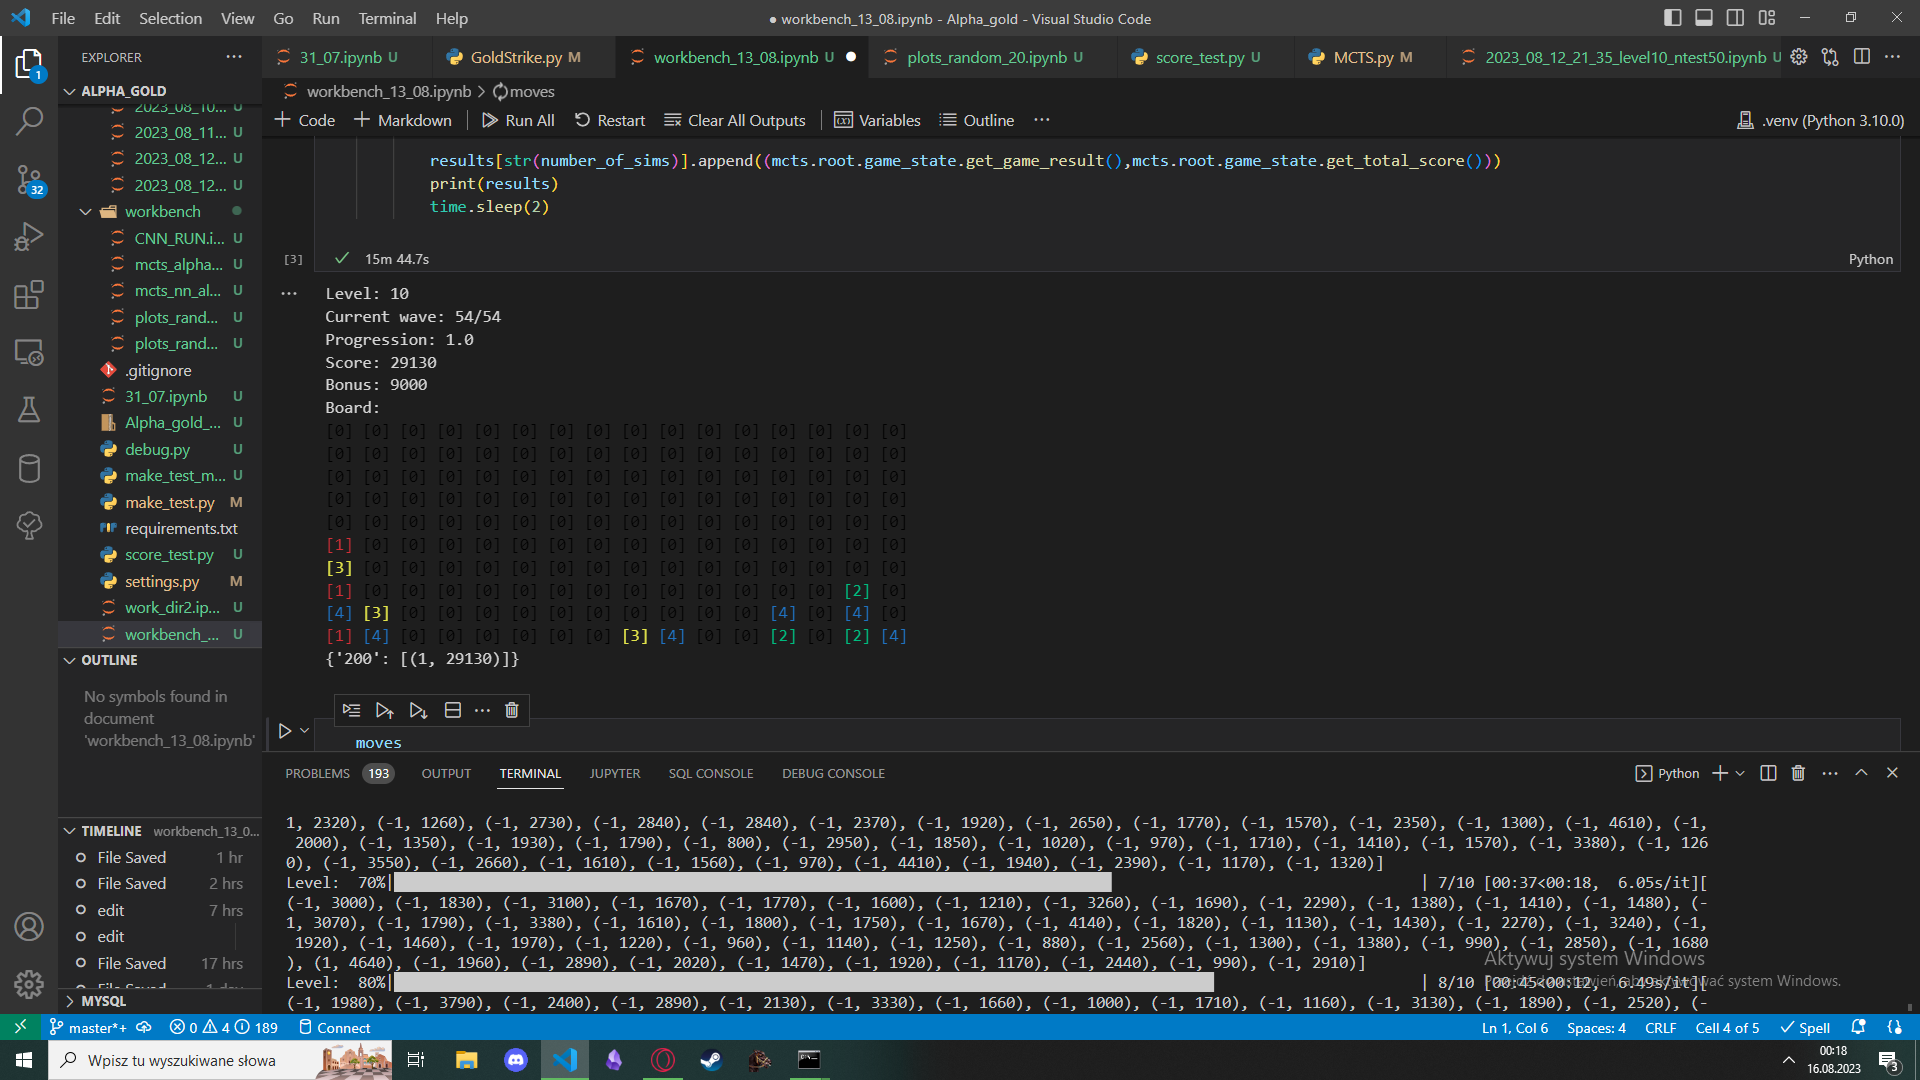


In [ ]:
moves

194

In [ ]:
# def get_state_value(self, current_state: GoldStrike, survival_rate):
#     status=current_state.get_game_result()
#     state_value=current_state.get_safe_value()*current_state.get_total_score()
#     if status == GAME_IN_PROGRESS or status==GAME_WON:
#         value = state_value
#     elif status == GAME_LOST:
#         value = -1*((1 - (current_state.get_safe_value()*survival_rate)) * current_state.get_total_score()) + state_value
#         value = (1 - survival_rate) * -1
        
#     return value
# def get_state_value(self, current_state: GoldStrike, survival_rate,temp_total_score):
#     value = current_state.game_result
#     if value == GAME_IN_PROGRESS or value==GAME_WON:
#         value = current_state.get_safe_value() * current_state.get_total_score()
#     elif value == GAME_LOST:
#         value = (1 - survival_rate) * (1-current_state.get_safe_value()) * -1  * temp_total_score
#     return value